# Introduction

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

## 1. Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from plotly.offline import init_notebook_mode,iplot


In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Get descriptive statistics before EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In this dataset there are 11 fields. Their name and datatypes are as follows
- Rank - Ranking of overall sales - integer
- Name - The games name - object
- Platform - Platform of the games release (i.e. PC,PS4, etc.) - object
- Year - Year of the game's release - float
- Genre - Genre of the game - object
- Publisher - Publisher of the game - object
- NA_Sales - Sales in North America (in millions) - float
- EU_Sales - Sales in Europe (in millions) - float
- JP_Sales - Sales in Japan (in millions) - float
- Other_Sales - Sales in the rest of the world (in millions) - float
- Global_Sales - Total worldwide sales. - float

In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

From the statistics, we can see that:<br>
    - There's a total of 16598 games in this dataset, with 271 missing value in the "Year" column, and 58 missing value in the "Publisher" column<br>
    - 75% games were released before 2010 and 50% of them were released before 2007

In [6]:
#Drop null value
df = df.dropna()

#Platform
Let's look at the all the platforms

In [7]:
df['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

# EDA

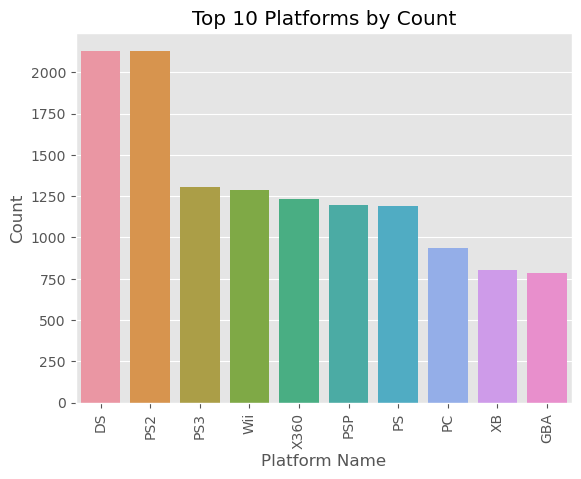

In [8]:
# Make a Bar plot of 10 most common Platforms
platform = Counter(df['Platform'].tolist()).most_common(10)
names = [x[0] for x in platform]
counts = [x[1] for x in platform]

plt.style.use("ggplot")
sns.barplot(x=names, y=counts)
plt.title("Top 10 Platforms by Count")
plt.xlabel("Platform Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [9]:
total_sales_column = 'Total_Sales'  # Define the total_sales_column

if 'Total_Shipped' in df.columns:
    df[total_sales_column] = df['Total_Shipped'] + df['Global_Sales']
else:
    regions = ['NA', 'JP', 'EU', 'Other']
    region_sales_sufix = '_Sales'
    df[total_sales_column] = df['Global_Sales']

tdf = df.copy()
tdf = tdf.sort_values('Year', ascending=True)

fig = px.histogram(
    tdf,
    x='Platform',
    animation_frame='Year',
    range_y=[0, 500],
)
#add name to the plot
fig.update_layout(
    title='Platform distribution by year',
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending') 
fig.show()

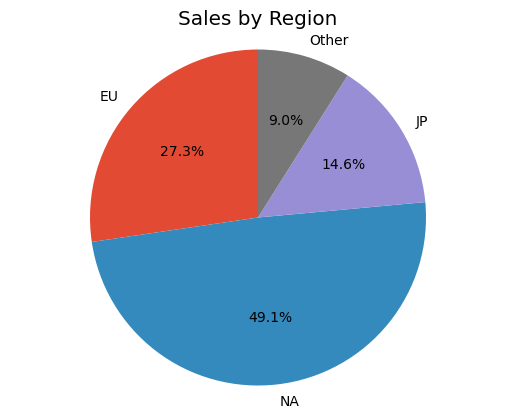

In [11]:
region = df.iloc[:, 6:10]
#Sales by Region
eu_sales = region['EU_Sales'].sum()
na_sales = region['NA_Sales'].sum()
jp_sales = region['JP_Sales'].sum()
other_sales = region['Other_Sales'].sum()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'EU', 'NA', 'JP', 'Other'
sizes = [eu_sales, na_sales, jp_sales, other_sales]
#print the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sales by Region")
plt.show()

In [60]:
import plotly.express as px

top100_games = df.head(100)

fig = go.Figure()

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
colors = ['#d32e4d', '#4fb3f9', '#55bca1', '#e4d747']
names = ['North America', 'Europe', 'Japan', 'Other']

for region, color, name in zip(regions, colors, names):
    fig.add_trace(go.Scatter(
        x=top100_games['Rank'],
        y=top100_games[region],
        mode='markers',
        marker=dict(color=color, size=12),
        name=name,
        text=top100_games['Name']
    ))

fig.update_layout(
    title='Top 100 Video Games Sales by Region',
    xaxis=dict(title='Rank'),
    yaxis=dict(title='Sales(In Millions)'),
    paper_bgcolor='#f5f5f5',
    plot_bgcolor='#f5f5f5',
    hovermode='x'
)

fig.show()

- As seen on the top 100 video games, **North America** often has the **highest** sales, followed by Europe and Japan. Although North America and Europe sales in general have led to these rankings, There are 2 games: GTA: San Andreas (ranked 18) and Gran Turismo (ranked 48), which have **highest** sales in **Other regions**.

- Nintendogs (ranked 11), GTA 5 (ranked 17), Brain: Train Your Brain in Minutes a Day (ranked 20), Call of Duty: Black Ops II (ranked 35), Call of Duty: Modern Warfare 3 (ranked 38), Gran Turismo 5 (ranked 55), FIFA 16 (ranked 78), FIFA Soccer 2013 (ranked 83), The Sims 3 (ranked 84), Star Wars Battlefront (ranked 93), and Call of Duty: Advanced Warfare (ranked 94) are the **most sold** in the **European** region.

- Games that are sold the **most** in **Japan** are: Pokemon Black / Pokemon White (ranked 27), Animal Crossing: Wild World (ranked 42), Final Fantasy VII (ranked 67), Animal Crossing (ranked 74), Super Mario Kart (ranked 77),
Final Fantasy VIII (ranked 88)

- The top 10 video games with higest sale are as follows:
    1.  Wii Sports
    2.  Super Mario Bros
    3.  Mario Kart Wii
    4.  Wii Sports Resort
    5.  Pokemon Red/Pokemon Blue
    6.  Tetris
    7.  New Super Mario Bros
    8.  Wii Play
    9.  New Super Mario Bros Wii
    10. Duck Hunt

Next, let's have a look at the bubble graph to see the release years of top 100 video game sales

In [64]:
fig = px.scatter(top100_games, x='Rank', y='Year',
                 size='Global_Sales', color='Global_Sales',
                 color_continuous_scale='Blackbody',
                 labels={'x':'Rank', 'y':'Years'},
                 title='Release Years of Top 100 Video Games According to Global Sales',
                 hover_name='Name',
                 hover_data=['Publisher', 'Platform', 'Genre', 'Global_Sales'])

fig.update_layout(
    paper_bgcolor='#f5f5f5',
    plot_bgcolor='#f5f5f5',
    hovermode='x',
    
)

fig.show()

- This buble graph is based on the release years and global sales ranking of video games. The size and color was based on the global sales. On hover, you can view more information about that game.

- As can be seen from the graph, majority of the most sale games in top 20 was released after 2000.

- 